<a href="https://colab.research.google.com/github/moncykurien/practice_projects/blob/master/PracticeProject3_SonarProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sonar Project - Mines and Rocks prediction

In this project we will be using data received from SONAR readings and classify if the object detected is a Mine or it is a Rock. This is a Binary Classification problem.

Dataset from : http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Load libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, zscore
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/sonar.all-data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [3]:
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[1]+1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

Observations:

All the variables are continuous.

In [5]:
df.isnull().sum().sum()

0

Observations:

There are no null values

In [6]:
df.shape

(208, 61)

Observations:

There are 208 Rows and 61 columns

In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

Observations:

1. All values are between 0 to 1
2. Many varialbles seem to be skewed.

In [8]:
df.agg(['skew','kurtosis']).T

,skew,kurtosis
0,2.131088,5.590145
1,2.155644,7.091235
2,2.652518,11.669560
3,3.401697,20.736121
4,2.018141,7.044579
5,1.248166,2.572759
6,0.970820,1.461410
7,1.481107,2.802407
8,1.633870,3.592943
9,1.281258,1.820620


Observations:

We can see that most of the variables are skewed with greater than 0.5

In [9]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

Observations:

The target classes seem to be balanced

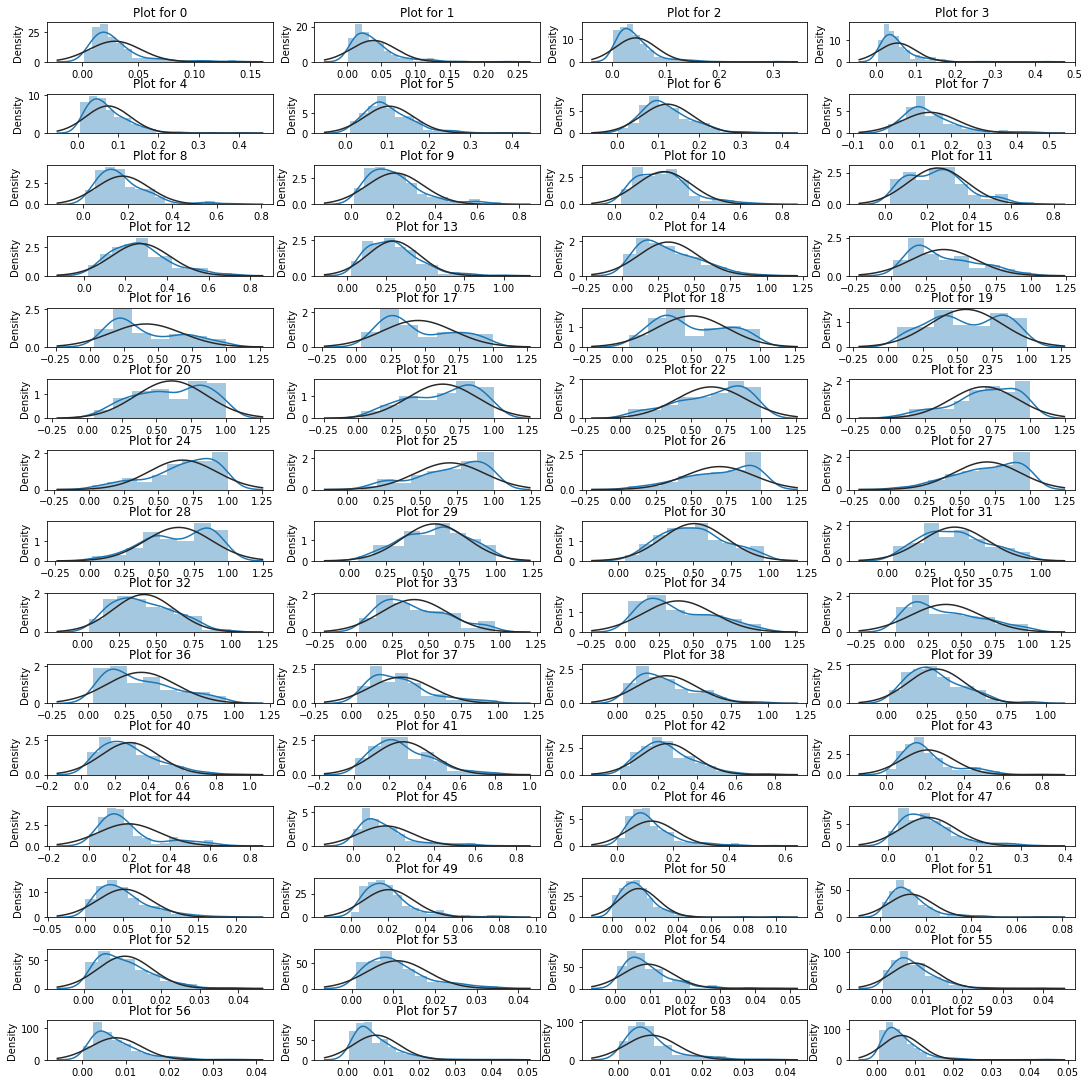

In [10]:
f,ax = plt.subplots(15,4,figsize=(15,15))
f.tight_layout()

i,j = 0,0
for col in df.iloc[:,:-1].columns:
    graph = sns.distplot(df[col],fit=norm, ax=ax[i,j])
    graph.set(xlabel=None)
    ax[i,j].set_title(f'Plot for {col}')
    
    j+=1
    if j%4==0:
        i+=1
        j=0

Observations:

1. Most of the variables are skewed and not normal distribution.
2. There are left skewed and righted skewed distributions amoung the variables.

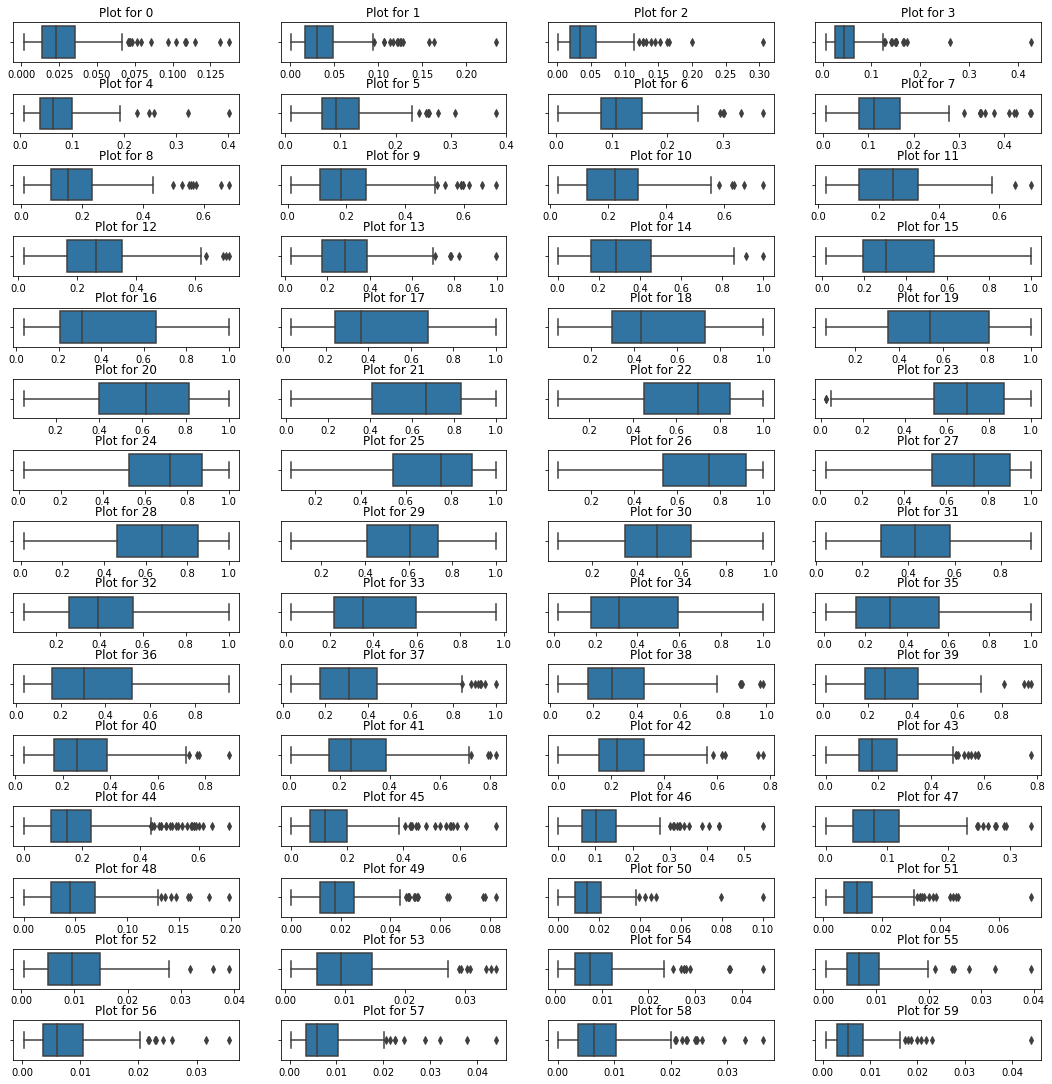

In [11]:
f,ax = plt.subplots(15,4,figsize=(15,15))
f.tight_layout()

i,j = 0,0
for col in df.iloc[:,:-1].columns:
    graph = sns.boxplot(df[col], ax=ax[i,j])
    graph.set(xlabel=None)
    ax[i,j].set_title(f'Plot for {col}')
    
    j+=1
    if j%4==0:
        i+=1
        j=0

Observations:

Most of the variables have outliers. We need to check and handle the outliers if necessary.

### Encoding the target variable since it is categorical

In [12]:
data = df.copy()
data[60] = df[60].apply(lambda x : 0 if x == 'R' else 1)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


Reference:

The Rocks are marked as 0 and Mines are marked as 1

### Correlation

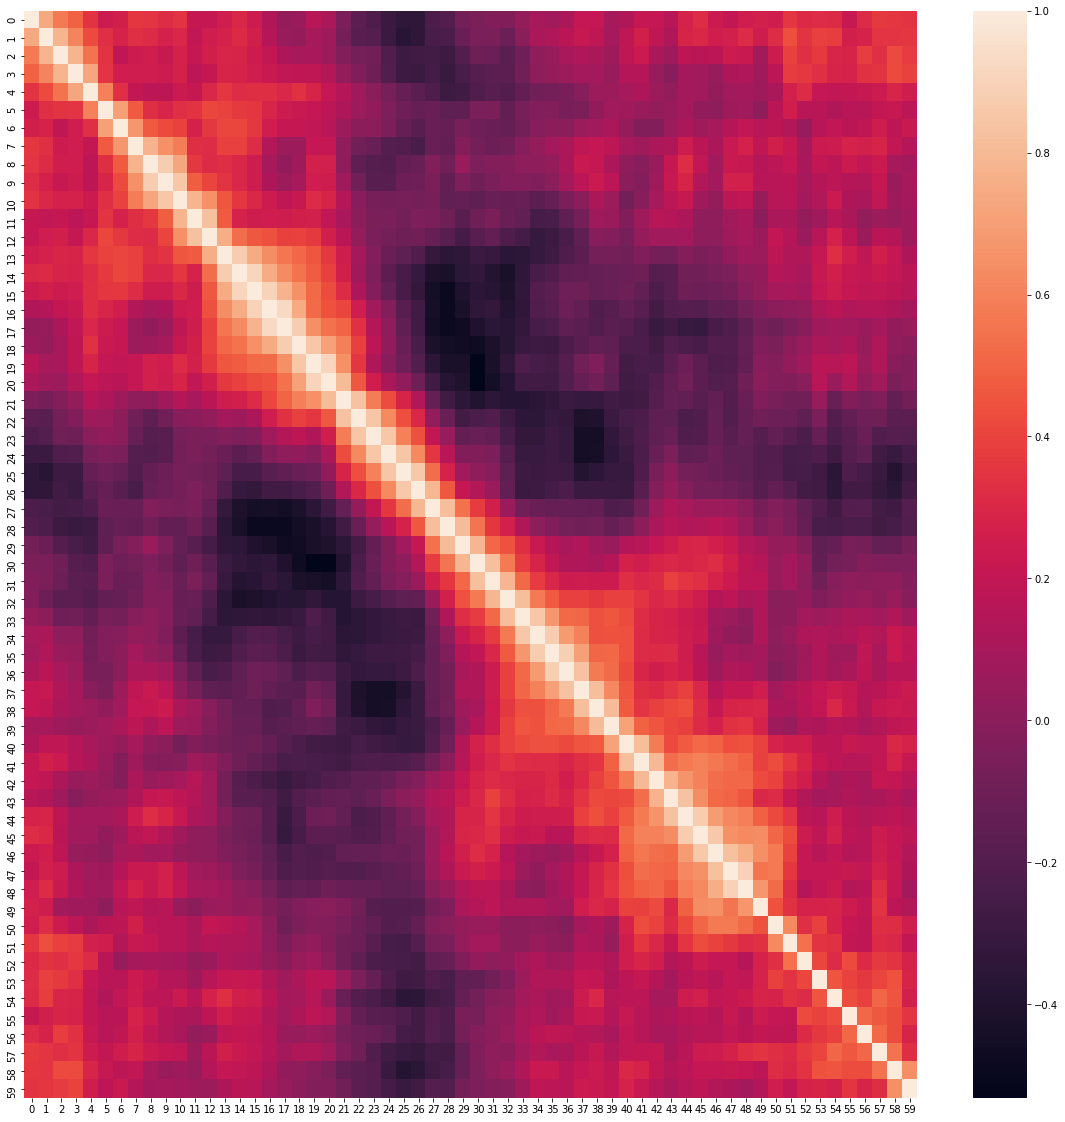

In [13]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr)
plt.show()

Observations:

We can observe some strong positive and negative correlations in the dataset

### Outliers

In [14]:
z_scores = np.abs(zscore(data))
filter_df = (z_scores < 3).all(axis=1)
new_data_z = data[filter_df]
print(f'New df shape: {new_data_z.shape}, Old df shape: {data.shape}')
print(f'Total lose of data is {(data.shape[0]-new_data_z.shape[0])/data.shape[0]*100} %')

New df shape: (168, 61), Old df shape: (208, 61)
Total lose of data is 19.230769230769234 %


In [15]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1
filter_df = ((data >= Q1 - 1.5 * IQR) & (data <= Q3 + 1.5 *IQR)).all(axis=1)

new_data_iqr = data[filter_df]
print(f'New df shape: {new_data_iqr.shape}, Old df shape: {data.shape}')
print(f'Total lose of data is {(data.shape[0]-new_data_iqr.shape[0])/data.shape[0]*100} %')

New df shape: (134, 61), Old df shape: (208, 61)
Total lose of data is 35.57692307692308 %


Observations:

Apparently a lot of data is lost if we remove the outliers. The best way to decide if we need to remove the outliers would be to look at a base model performance and see the impact of outliers.

In [16]:
#X and y with outliers
X = data.iloc[:,:-1]
y = data[60]

#X and y treated by zscore outlier removal
x_z = new_data_z.iloc[:,:-1]
y_z = new_data_z[60]

#X and y treated by IQR outlier removal
x_iqr = new_data_iqr.iloc[:,:-1]
y_iqr = new_data_iqr[60]

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)
x_train_z, x_test_z, y_train_z, y_test_z = train_test_split(x_z,y_z,test_size = 0.3, random_state=0)
x_train_i, x_test_i, y_train_i, y_test_i = train_test_split(x_iqr,y_iqr,test_size = 0.20, random_state=0)

In [19]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('Test score with out removing the outliers: ',lr.score(x_test, y_test))
lr.fit(x_train_z, y_train_z)
print('Test score after removing the outliers by zscore method: ',lr.score(x_test_z, y_test_z))
lr.fit(x_train_i, y_train_i)
print('Test score after removing the outliers by IQR method: ',lr.score(x_test_i, y_test_i))

Test score with out removing the outliers:  0.8333333333333334
Test score after removing the outliers by zscore method:  0.7647058823529411
Test score after removing the outliers by IQR method:  0.7777777777777778


Observations:

It looks like if we remove the outliers in this case our model's performance is negatively impacted. So, taking into account the percentage of data that will be lost and the above model score experiment, I am going to assume that these outliers just be good data that are appearing as outliers just because we have less number of data points. If there were more data these points just might come into the range.

Hence I am not going to remove the outliers in this case.

### Finding the optimum Random State for train test split

In [20]:
#X and y with outliers
X = data.iloc[:,:-1]
y = data[60]

In [21]:
best_train_score = 0
best_test_score = 0
r_state = 0
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=i,stratify=y)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    train_score = lr.score(x_train, y_train)
    test_score = lr.score(x_test, y_test)

    #Making sure that the variace is as low as possible
    if round(train_score*100,1) == round(test_score*100,1):
        if test_score > best_test_score:
            best_test_score = test_score
            best_train_score = train_score
            r_state = i
        
print(f'At the Random_State {r_state}, the model performs very well.')
print(f'Train score is {best_train_score*100}')
print(f'Test score is {best_test_score*100}')
    



At the Random_State 6, the model performs very well.
Train score is 84.13793103448276
Test score is 84.12698412698413


Observations:

With a random state of 6 the is performing well.

### Data Transformation and scaling

Since there are outliers in the dataset, I am going to use RobustScaler.

In [42]:
#X and y with outliers
X = data.iloc[:,:-1]
y = data[60]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=6,stratify=y)

In [43]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
trans.fit(x_train)
x_train_trans = trans.transform(x_train)
x_test_trans = trans.transform(x_test)
# convert the array back to a dataframe
x_train_trans = pd.DataFrame(x_train_trans)
x_test_trans = pd.DataFrame(x_test_trans)


In [44]:
lr = LogisticRegression()
lr.fit(x_train_trans, y_train)
print('Train score with out removing the outliers: ',lr.score(x_train_trans, y_train))
print('Test score with out removing the outliers: ',lr.score(x_test_trans, y_test))

Train score with out removing the outliers:  0.9310344827586207
Test score with out removing the outliers:  0.8095238095238095


### Model Selection

LogisticRegression: Mean score: 0.766  Variance: 0.016
DecisionTreeClassifier: Mean score: 0.592  Variance: 0.014
KNeighborsClassifier: Mean score: 0.786  Variance: 0.009
GaussianNB: Mean score: 0.647  Variance: 0.034
SVC: Mean score: 0.8  Variance: 0.008


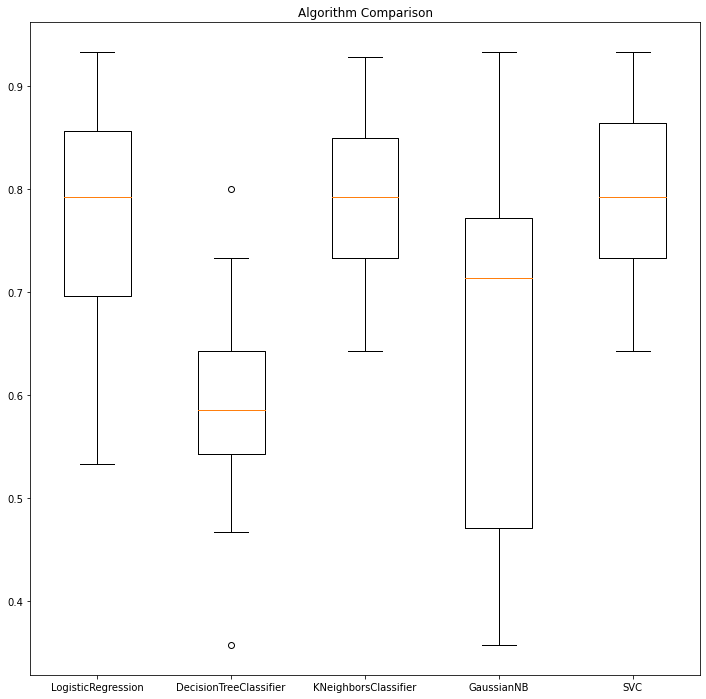

In [ ]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]
results = []
m_names = []
for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=6, shuffle=True)
    cv_result = cross_val_score(model, x_train_trans, y_train, cv= kfold, scoring = 'accuracy')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    


# Compare Algorithms
plt.figure(figsize = (12,12))
plt.title('Algorithm Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

Observations:

From the above we can see that SVC and KNN are doing better than LogisticRegression.

Now lets Standardize the data and see if that improves the score.

LogisticRegression: Mean score: 0.76  Variance: 0.012
DecisionTreeClassifier: Mean score: 0.634  Variance: 0.013
KNeighborsClassifier: Mean score: 0.752  Variance: 0.012
GaussianNB: Mean score: 0.647  Variance: 0.034
SVC: Mean score: 0.807  Variance: 0.009


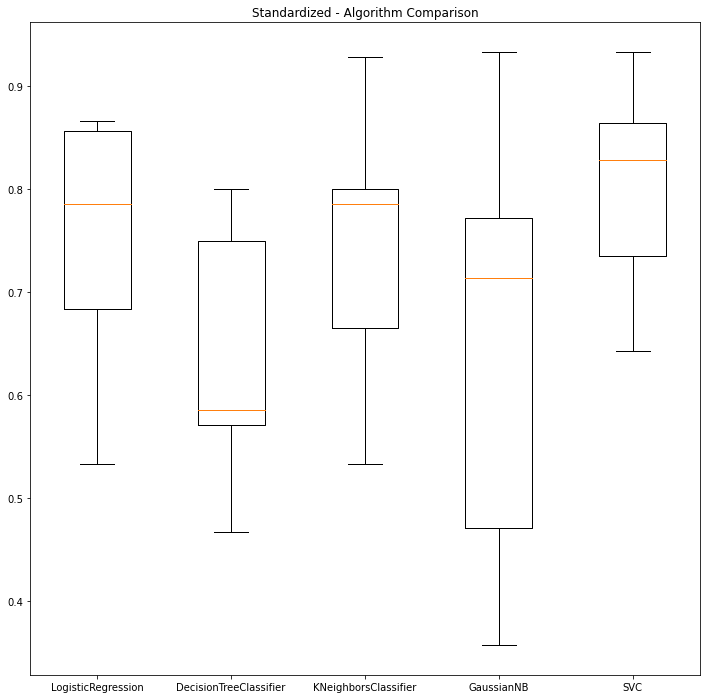

In [ ]:
#Standardizing

models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC()]
results = []
m_names = []

sc= StandardScaler()
x_train_trans_sc = sc.fit_transform(x_train_trans)

for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=6, shuffle=True)
    cv_result = cross_val_score(model, x_train_trans_sc, y_train, cv= kfold, scoring = 'accuracy')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    

# Compare Algorithms
plt.figure(figsize = (12,12))
plt.title('Standardized - Algorithm Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

Observations:

1. Standardization improved SVC.

### Ensembles

Lets test some Ensemble techniques and compare with SVC

AdaBoostClassifier: Mean score: 0.724  Variance: 0.013
GradientBoostingClassifier: Mean score: 0.788  Variance: 0.016
RandomForestClassifier: Mean score: 0.827  Variance: 0.008
[16:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

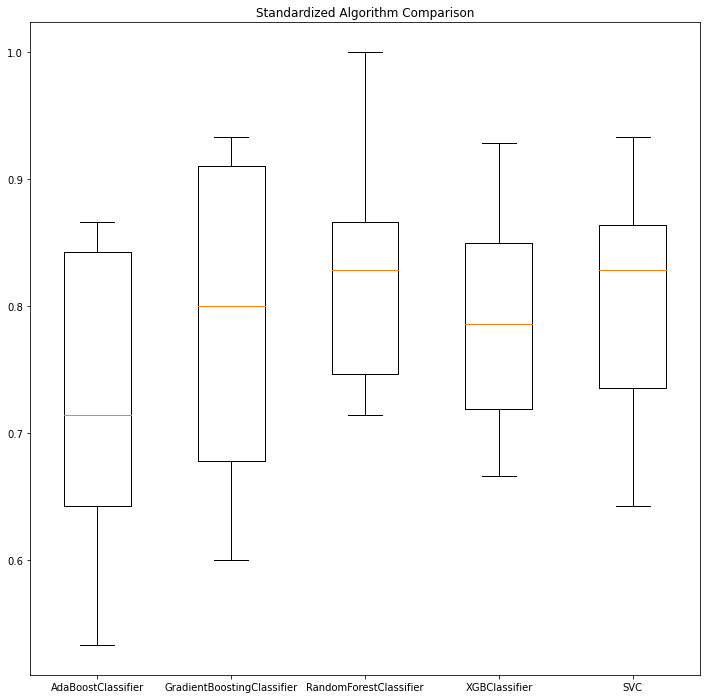

In [ ]:
models = [AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),XGBClassifier(),SVC()]
results = []
m_names = []

sc= StandardScaler()
x_train_trans_sc = sc.fit_transform(x_train_trans)


for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=6, shuffle=True)
    cv_result = cross_val_score(model, x_train_trans_sc, y_train, cv= kfold, scoring = 'accuracy')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    


# Compare Algorithms
plt.figure(figsize = (12,12))
plt.title('Standardized Algorithm Comparison')
plt.boxplot(results)
plt.xticks(np.arange(1,len(m_names)+1),labels=m_names)
plt.show()    

Observations:

1. SVC and RandomForestClassifier are pretty close and performing well.

### Hyperparameter tuning

In [48]:
sc= StandardScaler()
x_train_trans_sc = sc.fit_transform(x_train_trans)

In [ ]:
params = {'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'gamma': ['scale', 'auto']
             }
model = SVC()

kfold = KFold(n_splits=10, random_state=6, shuffle=True)
gridcv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=kfold)
grid_result = gridcv.fit(x_train_trans_sc, y_train)

print(f"The Best score for SVC : {grid_result.best_score_} with parameters: {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
var = grid_result.cv_results_['std_test_score']**2
params = grid_result.cv_results_['params']


The Best score for SVC : 0.8480952380952381 with parameters: {'C': 0.9, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 5)]
# Number of features to consider at every split
criterion =  ['gini','entropy']
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 110, num = 5)]


# Create the random grid
params = {'n_estimators': n_estimators,
          'criterion' : criterion,
          'max_features': max_features,
          'max_depth': max_depth}


model = RandomForestClassifier()

kfold = KFold(n_splits=10, random_state=6, shuffle=True)
randcv = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=kfold, n_jobs=-1, verbose=10)

#randcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_jobs = -1, scoring='accuracy', cv=kfold, n_iter = 10, random_state = 0)

rand_result = randcv.fit(x_train_trans_sc, y_train)

In [63]:
print(f"The Best score : {rand_result.best_score_} with parameters: {rand_result.best_params_}")
means = rand_result.cv_results_['mean_test_score']
var = rand_result.cv_results_['std_test_score']**2
params = rand_result.cv_results_['params']


The Best score : 0.8419047619047619 with parameters: {'criterion': 'entropy', 'max_depth': 29, 'max_features': 'auto', 'n_estimators': 1050}


### Creating Pipelines and choosing the final model

In [64]:
pipe_SVC = Pipeline([('robust_scaler', RobustScaler()),
                     ('Standardize', StandardScaler()),
                     ('svc', SVC(C= 0.9, gamma= 'auto', kernel= 'poly'))])

In [66]:
X = data.iloc[:,:-1]
y = data[60]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=6,stratify=y)

In [67]:
pipe_SVC.fit(x_train, y_train)
y_pred_svc = pipe_SVC.predict(x_test)
print(f'Test accuracy score for SVC model is {accuracy_score(y_test, y_pred_svc)}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc, target_names=['R','M']))

Test accuracy score for SVC model is 0.873015873015873
Confusion Matrix:
[[26  3]
 [ 5 29]]
              precision    recall  f1-score   support

           R       0.84      0.90      0.87        29
           M       0.91      0.85      0.88        34

    accuracy                           0.87        63
   macro avg       0.87      0.87      0.87        63
weighted avg       0.88      0.87      0.87        63



Observations:

1. In this problem it is very critical to classify 'Mines' correctly even if the model makes some mistake in classifying 'Rocks'. Because more that Rocks classified as Mines, if Mines are classified as Rocks it could be disasterous
2. Based on the observations SVC is doing a better job in classifying Mines as Mines correctly and is also doing a good job at classifying Rock as Rock than RandomForestClassifier. Hence choosing it as the best model.

### Saving the model

In [ ]:
import joblib
joblib.dump(pipe_SVC, './models/sonar_model.pkl')

['./models/sonar_model.pkl']

In [ ]:
#Verifying model
modl = joblib.load('./models/sonar_model.pkl')
modl.predict(x_test)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
      dtype=int64)